**Sea Level Predictor**

### Instructions

You will analyze a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

Use the data to complete the following tasks:
``` bash
- Use Pandas to import the data from epa-sea-level.csv.
- Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.
- Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit.
  - Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
  - Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
-The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.
```


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

- Use Pandas to import the data from epa-sea-level.csv.

In [2]:
df = pd.read_csv('epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [3]:
df2=df.isnull().sum()
df2

,0
Year,0
CSIRO Adjusted Sea Level,0
Lower Error Bound,0
Upper Error Bound,0
NOAA Adjusted Sea Level,113


  - Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.
  - Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit.
  - Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
  - Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.


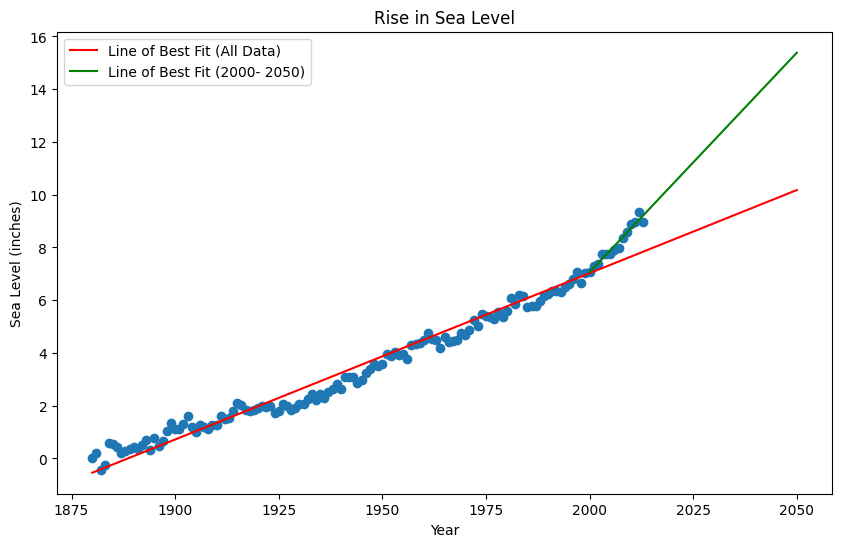

In [4]:
# plots the line of best fit over the scatter plot and extend to the year to 2050 to make the prediction

def draw_plot():

  plt.figure(figsize=(10,6))
  scatter_plot = plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level']) # generating the scatter plot
  slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level']) # computes the fit parameters for all data
  line_x = np.arange(df['Year'].min(), 2051) # extends the year to 2050
  line_y = slope * line_x + intercept # fit function
  plt.plot(line_x, line_y, color= 'red', label = 'Line of Best Fit (All Data)') # plots the line of best fit for all data
  df_filtered = df[df['Year'] >= 2000] # filter year data (year after 2000)
  slope_2000, intercept_2000, _,_,_ = linregress(df_filtered['Year'], df_filtered['CSIRO Adjusted Sea Level']) # fit the data with linear regression
  line_x_filtered = np.arange(df_filtered['Year'].min(), 2051) # filtered year extended to 2050 (2000-2050)
  line_y_filtered = slope_2000 * line_x_filtered + intercept_2000
  plt.plot(line_x_filtered, line_y_filtered, color= 'green', label = 'Line of Best Fit (2000- 2050)') # plots the line of best fit from the year 2000 to the current year and extends to 2050 for prediction
  plt.title("Rise in Sea Level")
  plt.xlabel('Year')
  plt.ylabel('Sea Level (inches)')
  plt.legend()
  plt.savefig('sea_level_plot.png')
  actual_data = scatter_plot.get_offsets().data.tolist()
  return plt.gca()



axes = draw_plot()

In [5]:
# Runs the unittest
!python3 -m unittest test_module




....
----------------------------------------------------------------------
Ran 4 tests in 1.424s

OK
